In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Feature Selection ---
# First, define the exact features you need for the model.
features = [
    'loan_amnt',
    'int_rate',
    'grade',
    'emp_length',
    'home_ownership',
    'annual_inc',
    'dti', # Debt-to-Income Ratio
    'is_bad_loan'
]

# --- Memory-Efficient Data Loading ---
# Use the 'usecols' parameter to load ONLY the columns from the 'features' list.
# This prevents the 'out of memory' error.
model_df = pd.read_csv(
    '../data/processed_data.csv', 
    usecols=features
)

# Drop any rows in our selected data that still have null values.
model_df.dropna(inplace=True)

# Now you can proceed with your analysis on the much smaller 'model_df'
print("Data loaded successfully with selected features.")
print(model_df.head())

Data loaded successfully with selected features.
   loan_amnt  int_rate grade  emp_length home_ownership  annual_inc    dti  \
0     3600.0     13.99     C        10.0       MORTGAGE     55000.0   5.91   
1    24700.0     11.99     C        10.0       MORTGAGE     65000.0  16.06   
2    20000.0     10.78     B        10.0       MORTGAGE     63000.0  10.78   
3    35000.0     14.85     C        10.0       MORTGAGE    110000.0  17.06   
4    10400.0     22.45     F         3.0       MORTGAGE    104433.0  25.37   

   is_bad_loan  
0            0  
1            0  
2            0  
3            0  
4            0  


In [3]:
# Convert categorical variables into dummy/indicator variables
categorical_features = ['grade', 'home_ownership']
model_df_encoded = pd.get_dummies(model_df, columns=categorical_features, drop_first=True)

# Separate our features (X) from our target (y)
X = model_df_encoded.drop('is_bad_loan', axis=1)
y = model_df_encoded['is_bad_loan']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the numerical features
# This is important for models like Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Initialize and train the model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model training complete.")

Model training complete.


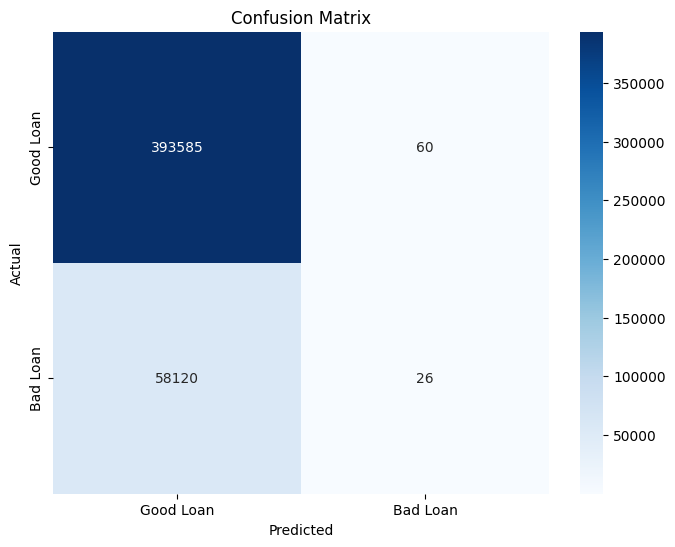

In [5]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good Loan', 'Bad Loan'], yticklabels=['Good Loan', 'Bad Loan'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [6]:
# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Good Loan', 'Bad Loan']))

              precision    recall  f1-score   support

   Good Loan       0.87      1.00      0.93    393645
    Bad Loan       0.30      0.00      0.00     58146

    accuracy                           0.87    451791
   macro avg       0.59      0.50      0.47    451791
weighted avg       0.80      0.87      0.81    451791

